In [130]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

In [131]:
class Perceptron:
    def __init__(self, eta: float = None, epochs: int = None):
        self.weights = np.random.rand(3) * 1e-4  # small Value
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training \n {self.weights}")
        self.epochs = epochs
        self.eta = eta

    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)

    def activation_function(self, z):
        return np.where(z > 0, 1, 0)

    def fit(self, X, y):
        self.X = X
        self.y = y

        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f'X_with_bias : \n{X_with_bias} ')

        for epoch in range(self.epochs):
            print(f'for epoch >> {epoch}')

            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f'Predicted Value after Forward Pass {y_hat}')

            self.error = self.y - y_hat
            print(f'error: \n {self.error}')

            self.weights = self.weights+self.eta * \
                np.dot(X_with_bias.T, self.error)
            print(
                f'updated Weights after epochs {epoch}/{self.epochs} -- > \n {self.weights}')

            print(
                '*-*-*-***-**-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')

    def predict(self, test_X):
        test_X_with_bias = np.c_[test_X, -np.ones((len(test_X), 1))]
        z = self._z_outcome(test_X_with_bias, self.weights)
        return self.activation_function(z)

    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"total loss \n {total_loss}")
        return total_loss

    def _create_dir_return_path(self, model_dir, file_name):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, file_name)

    def saving_model(self, file_name, model_dir):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(
                model_dir, file_name)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", file_name)
            joblib.dump(self, model_file_path)

    def load_model(self, file_path):
        return joblib.load(file_path)

In [132]:
def prepare_data(df, target_col="y"):
    X = df.drop(target_col, axis=1)

    y = df[target_col]

    return X, y


In [133]:
AND = {"x1": [0, 0, 1, 1], "x2": [0, 1, 0, 1], "y": [0, 0, 0, 1]}

df_AND = pd.DataFrame(AND)
print(df_AND)
X, y = prepare_data(df_AND)
ETA = 0.1
EPOCHS = 20
model_and = Perceptron(epochs=EPOCHS, eta=ETA)
model_and.fit(X=X, y=y)

_ = model_and.total_loss()

   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1
initial weights before training 
 [1.06606515e-05 7.95818819e-05 3.59140486e-06]
X_with_bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]] 
for epoch >> 0
Predicted Value after Forward Pass [0 1 1 1]
error: 
 0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated Weights after epochs 0/20 -- > 
 [-0.09998934 -0.09992042  0.20000359]
*-*-*-***-**-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
for epoch >> 1
Predicted Value after Forward Pass [0 0 0 0]
error: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated Weights after epochs 1/20 -- > 
 [1.06606515e-05 7.95818819e-05 1.00003591e-01]
*-*-*-***-**-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
for epoch >> 2
Predicted Value after Forward Pass [0 0 0 0]
error: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated Weights after epochs 2/20 -- > 
 [1.00010661e-01 1.00079582e-01 3.59140486e-06]
*-*-*-*

In [134]:
XOR = {"x1": [0, 0, 1, 1], "x2": [0, 1, 0, 1], "y": [0, 1, 1, 0]}

df_XOR = pd.DataFrame(XOR)
print(df_AND)
X, y = prepare_data(df_XOR)
ETA = 0.1
EPOCHS = 20
model_XOR = Perceptron(epochs=EPOCHS, eta=ETA)
model_XOR.fit(X=X, y=y)

_ = model_XOR.total_loss()

   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1
initial weights before training 
 [5.97764115e-05 3.89516949e-05 4.31044245e-05]
X_with_bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]] 
for epoch >> 0
Predicted Value after Forward Pass [0 0 1 1]
error: 
 0    0
1    1
2    0
3   -1
Name: y, dtype: int64
updated Weights after epochs 0/20 -- > 
 [-9.99402236e-02  3.89516949e-05  4.31044245e-05]
*-*-*-***-**-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
for epoch >> 1
Predicted Value after Forward Pass [0 0 0 0]
error: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated Weights after epochs 1/20 -- > 
 [ 5.97764115e-05  1.00038952e-01 -1.99956896e-01]
*-*-*-***-**-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
for epoch >> 2
Predicted Value after Forward Pass [1 1 1 1]
error: 
 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated Weights after epochs 2/20 -- > 
 [-9.99402236e-02  3.89516949e-05  4.310

In [135]:
OR = {"x1": [0, 0, 1, 1], "x2": [0, 1, 0, 1], "y": [0, 1, 1, 1]}

df_OR = pd.DataFrame(OR)
print(df_OR)
X, y = prepare_data(df_OR)
ETA = 0.1
EPOCHS = 20
model_OR = Perceptron(epochs=EPOCHS, eta=ETA)
model_OR.fit(X=X, y=y)

_ = model_OR.total_loss()

   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1
initial weights before training 
 [8.51910299e-05 7.84774764e-05 5.41528306e-05]
X_with_bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]] 
for epoch >> 0
Predicted Value after Forward Pass [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated Weights after epochs 0/20 -- > 
 [8.51910299e-05 7.84774764e-05 5.41528306e-05]
*-*-*-***-**-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
for epoch >> 1
Predicted Value after Forward Pass [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated Weights after epochs 1/20 -- > 
 [8.51910299e-05 7.84774764e-05 5.41528306e-05]
*-*-*-***-**-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
for epoch >> 2
Predicted Value after Forward Pass [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated Weights after epochs 2/20 -- > 
 [8.51910299e-05 7.84774764e-05 5.41528306e-05

In [136]:
XOR = {"x1": [0, 0, 1, 1], "x2": [0, 1, 0, 1], "y": [0, 1, 1, 0]}

df_XOR = pd.DataFrame(XOR)
print(df_XOR)
X, y = prepare_data(df_XOR)
ETA = 0.1
EPOCHS = 20
model_XOR = Perceptron(epochs=EPOCHS, eta=ETA)
model_XOR.fit(X=X, y=y)

_ = model_OR.total_loss()

   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0
initial weights before training 
 [7.86761958e-05 7.92806674e-06 3.61822016e-05]
X_with_bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]] 
for epoch >> 0
Predicted Value after Forward Pass [0 0 1 1]
error: 
 0    0
1    1
2    0
3   -1
Name: y, dtype: int64
updated Weights after epochs 0/20 -- > 
 [-9.99213238e-02  7.92806674e-06  3.61822016e-05]
*-*-*-***-**-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
for epoch >> 1
Predicted Value after Forward Pass [0 0 0 0]
error: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated Weights after epochs 1/20 -- > 
 [ 7.86761958e-05  1.00007928e-01 -1.99963818e-01]
*-*-*-***-**-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
for epoch >> 2
Predicted Value after Forward Pass [1 1 1 1]
error: 
 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated Weights after epochs 2/20 -- > 
 [-9.99213238e-02  7.92806674e-06  3.618

In [137]:
def save_plot(df, model, file_name="plot.png",plot_dir = 'plot'):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        figure = plt.gcf()
        figure.set_size_inches(10, 8)

    def _plot_decision_regions(X,y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors=colors)

        X = X.values
        x1 = X[:, 0]
        x2 = X[:, 1]

        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1

        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
        

    X, y = prepare_data(df=df)
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)

    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, file_name)
    plt.savefig(plot_path)
    


In [138]:
def save_plotS(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

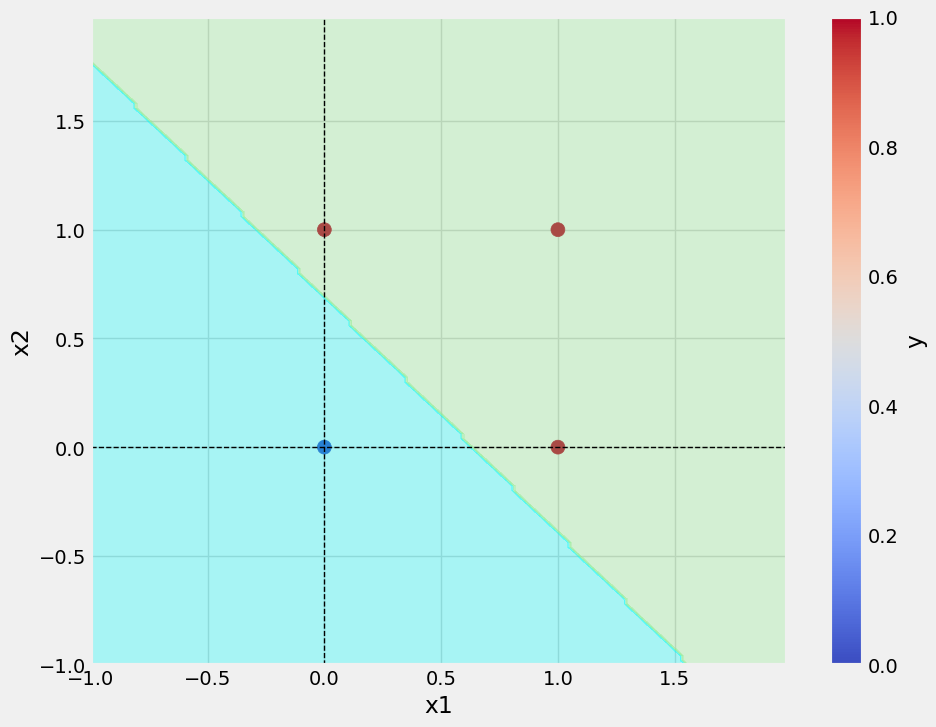

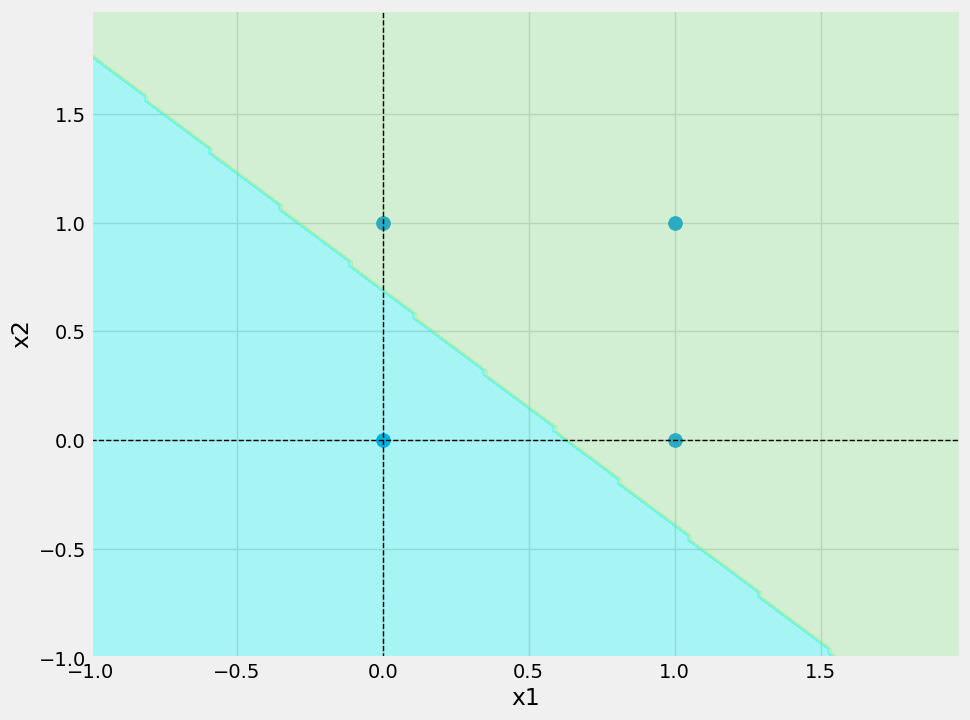

In [139]:
save_plotS(df_OR, model_OR, filename="or.png")
save_plot(df_OR, model_OR, file_name="or.png")


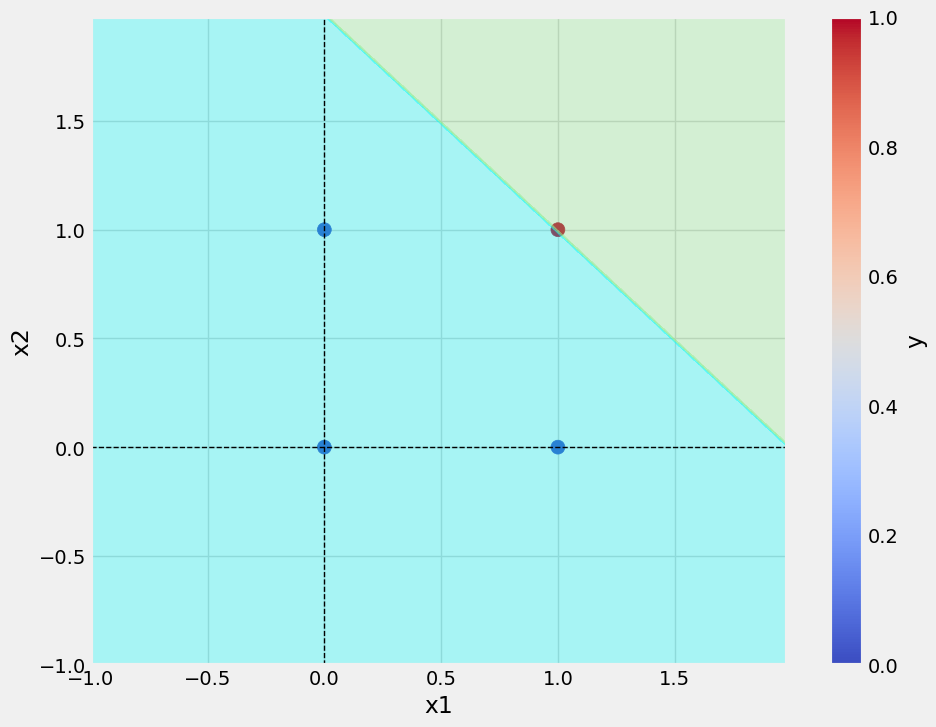

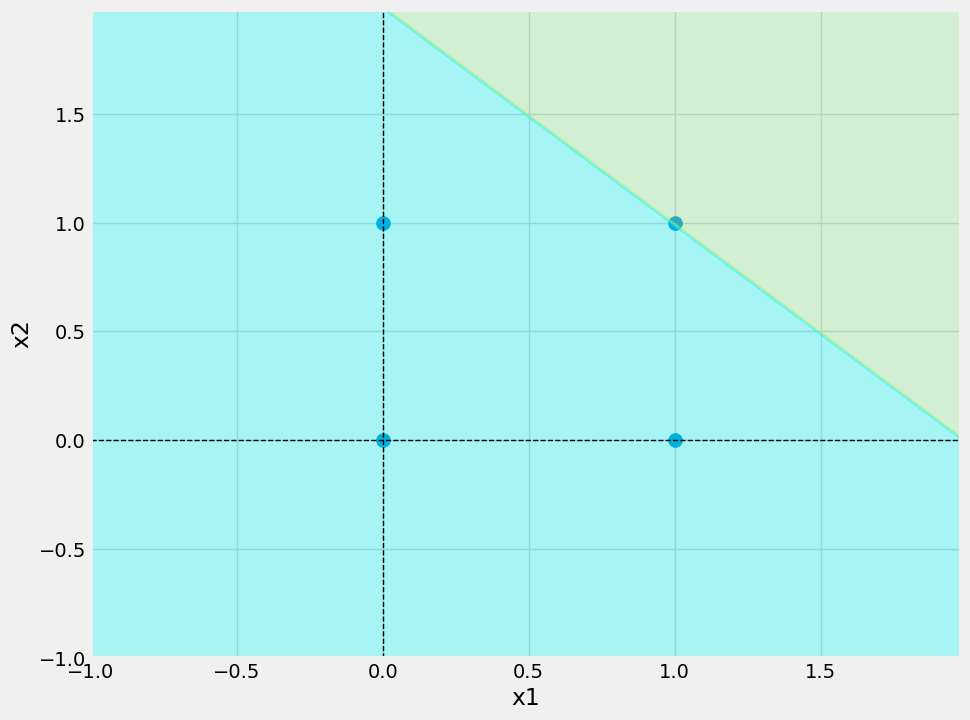

In [140]:
save_plotS(df_AND, model_and, filename="and.png")
save_plot(df_AND, model_and, file_name="and.png")


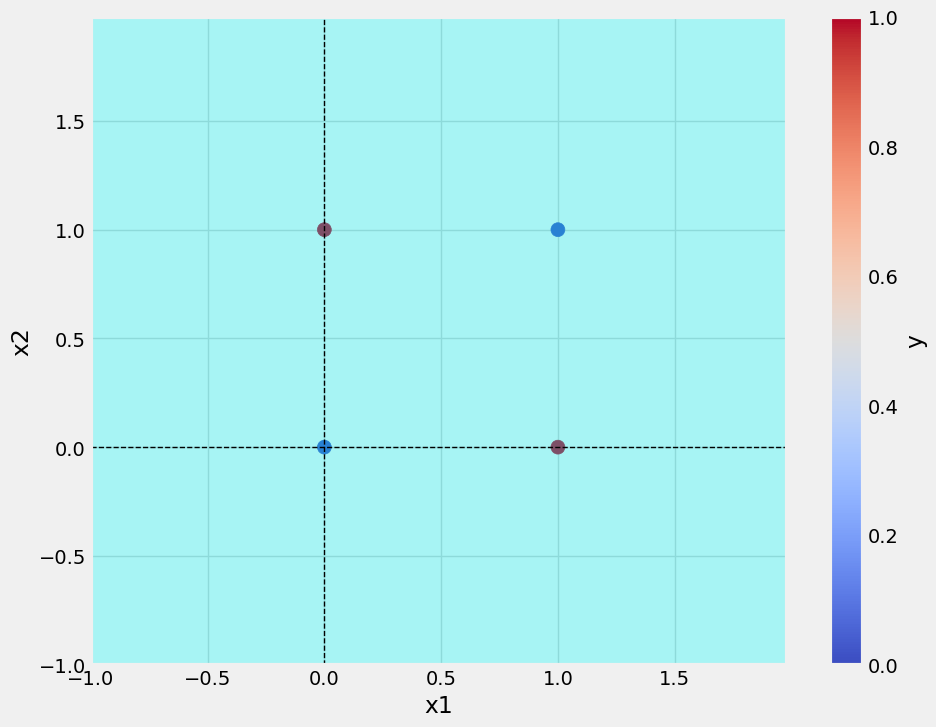

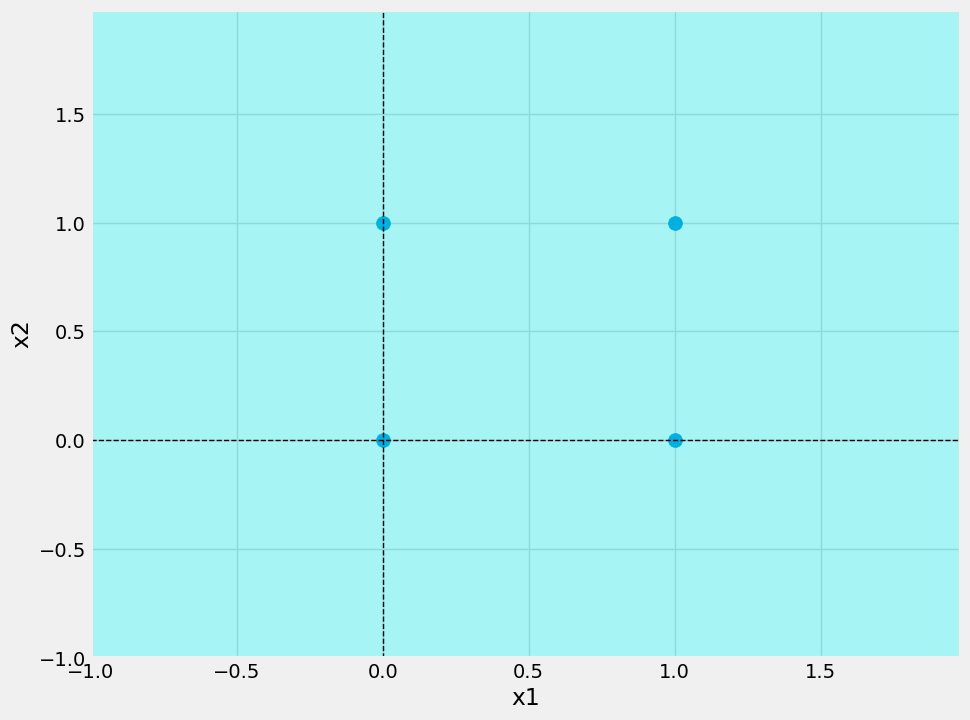

In [141]:
save_plotS(df_XOR, model_XOR, filename="XOR.png")
save_plot(df_XOR, model_XOR, file_name="xor.png")
